## 形態素解析の実行
- stopwordsによる削除を忘れないように．
- なお，保存先はMorphologicalAnalysisになるので，Positive ,Negative,Neutralに再度振り分け必須

In [8]:
stopwords = {'今日','✨','**','少ない', 'そう', 'か', 'さ', 'ずっと', 'が', 'も', 'いい', 'ため', 'こと', 'お', '感じ', 'れ', 'って', 'と', 'なり', 'だっ', '例えば', 'すごく', '別', '5', 'ほんと', 'しょ', 'だろ', '考え', '特別', 'する', '。', '本当に', '使っ', 'とき', 'たら', '思う', 'その', '良い', 'カス', '的', '後', 'ず', 'なっ', '：', 'たとえば', 'せ', 'の', 'う', 'なる', '**', 'wは', '中', 'あっ', 'もの', '2', 'よ', 'より', 'ます', 'たしか', 'として', 'ば', 'かけ', 'み', 'じゃ', 'だけ', 'よく', '？', 'ん', '日', 'によって', 'という', 'あり', 'や', '20', '428', '好み', 'です', 'は', 'この', '昔', 'どの', '1', 'それ', 'てる', 'ながら', 'ー', '一つ', '感じ', 'つい', 'ので', 'けど', 'nn', 'でき', 'なら', '確か', 'でも', 'ない', '感じる', '性', 'で', ':', 'どんな', 'それとも', '回', '！', '多い', '思い', 'よう', 'し', 'これ', 'こんにちは', '、', '立っ', '気', '」', 'まし', 'ちょっとした', '感', '少し', 'たり', 'ね', 'て', 'ください', 'あれ', '〜', '，', 'とか', 'について', 'しれ', 'ある', 'な', 'せよ', 'に', '特に', 'られ', '今', 'かも', 'い', 'なく', 'できる', 'ちょっと', 'これら', 'くらい', '室', 'ませ', 'た', 'き', 'だ', 'を', 'でしょ', 'かす', '「', 'でる', '4', 'から', '合わせ', 'なるほど', '何', 'あと', 'しっかり', 'まだ', 'たま', 'がら', 'やっ', 'なんて', '間', '.', 'まで', 'また', 'いる', '．', 'みる', 'どう', 'そんなに', 'など', 'たい', '分', 'さらに', 'られる', '最近', '比べる', '人'}

In [18]:
import os
import pandas as pd
import MeCab
from collections import Counter

# ユーザーに名前を入力させる
name = input("対象者の名前を入力してください: ")

# ファイルのパス設定
input_alpha_path = f"./TalkData/alpha_{name}.csv"
input_beta_path = f"./TalkData/beta_{name}.csv"

output_alpha_path = f"./Analyzed/MorphologicalAnalysis/morphologicalAnalyzed_alpha_{name}_frequent_words.csv"
output_beta_path = f"./Analyzed/MorphologicalAnalysis/morphologicalAnalyzed_beta_{name}_frequent_words.csv"

# データの読み込み
if not os.path.exists(input_alpha_path) or not os.path.exists(input_beta_path):
    raise FileNotFoundError("指定された名前のデータが見つかりません。")

alpha_df = pd.read_csv(input_alpha_path)
beta_df = pd.read_csv(input_beta_path)

print(f"{name} のデータを読み込みました。")

# MeCabの初期化
tagger = MeCab.Tagger("-Owakati -r /opt/homebrew/etc/mecabrc")

# 形態素解析を適用する関数
def tokenize_text(text):
    if pd.isna(text):
        return ""
    return tagger.parse(text).strip()

# データに形態素解析を適用
alpha_df["Tokenized"] = alpha_df["Detail"].apply(tokenize_text)
beta_df["Tokenized"] = beta_df["Detail"].apply(tokenize_text)

print("形態素解析を適用しました。")

# ストップワード（不要な単語のリスト）
# stopwords = {'**','少ない', 'そう', 'か', 'さ', 'ずっと', 'が', 'も', 'いい', 'ため', 'こと', 'お', '感じ', 'れ', 'って', 'と', 'なり', 'だっ', '例えば', 'すごく', '別', '5', 'ほんと', 'しょ', 'だろ', '考え', '特別', 'する', '。', '本当に', '使っ', 'とき', 'たら', '思う', 'その', '良い', 'カス', '的', '後', 'ず', 'なっ', '：', 'たとえば', 'せ', 'の', 'う', 'なる', '**', 'wは', '中', 'あっ', 'もの', '2', 'よ', 'より', 'ます', 'たしか', 'として', 'ば', 'かけ', 'み', 'じゃ', 'だけ', 'よく', '？', 'ん', '日', 'によって', 'という', 'あり', 'や', '20', '428', '好み', 'です', 'は', 'この', '昔', 'どの', '1', 'それ', 'てる', 'ながら', 'ー', '一つ', '感じ', 'つい', 'ので', 'けど', 'nn', 'でき', 'なら', '確か', 'でも', 'ない', '感じる', '性', 'で', ':', 'どんな', 'それとも', '回', '！', '多い', '思い', 'よう', 'し', 'これ', 'こんにちは', '、', '立っ', '気', '」', 'まし', 'ちょっとした', '感', '少し', 'たり', 'ね', 'て', 'ください', 'あれ', '〜', '，', 'とか', 'について', 'しれ', 'ある', 'な', 'せよ', 'に', '特に', 'られ', '今', 'かも', 'い', 'なく', 'できる', 'ちょっと', 'これら', 'くらい', '室', 'ませ', 'た', 'き', 'だ', 'を', 'でしょ', 'かす', '「', 'でる', '4', 'から', '合わせ', 'なるほど', '何', 'あと', 'しっかり', 'まだ', 'たま', 'がら', 'やっ', 'なんて', '間', '.', 'まで', 'また', 'いる', '．', 'みる', 'どう', 'そんなに', 'など', 'たい', '分', 'さらに', 'られる', '最近', '比べる', '人'}

# 頻出単語を集計する関数
def count_frequent_words(df):
    all_words = []
    for text in df["Tokenized"]:
        words = text.split()
        words = [word for word in words if word not in stopwords]
        all_words.extend(words)

    return Counter(all_words)

# 頻出単語を取得
alpha_word_counts = count_frequent_words(alpha_df)
beta_word_counts = count_frequent_words(beta_df)

print("頻出単語を集計しました。")

# 頻出単語の上位50単語をデータフレームに変換
alpha_word_df = pd.DataFrame(alpha_word_counts.most_common(50), columns=["Word", "Count"])
beta_word_df = pd.DataFrame(beta_word_counts.most_common(50), columns=["Word", "Count"])

# 結果を保存
alpha_word_df.to_csv(output_alpha_path, index=False, encoding="utf-8-sig")
beta_word_df.to_csv(output_beta_path, index=False, encoding="utf-8-sig")

print(f"結果を {output_alpha_path} に保存しました。")
print(f"結果を {output_beta_path} に保存しました。")

Koga のデータを読み込みました。
形態素解析を適用しました。
頻出単語を集計しました。
結果を ./Analyzed/MorphologicalAnalysis/morphologicalAnalyzed_alpha_Koga_frequent_words.csv に保存しました。
結果を ./Analyzed/MorphologicalAnalysis/morphologicalAnalyzed_beta_Koga_frequent_words.csv に保存しました。


In [8]:
stopwords = {'**','少ない', 'そう', 'か', 'さ', 'ずっと', 'が', 'も', 'いい', 'ため', 'こと', 'お', '感じ', 'れ', 'って', 'と', 'なり', 'だっ', '例えば', 'すごく', '別', '5', 'ほんと', 'しょ', 'だろ', '考え', '特別', 'する', '。', '本当に', '使っ', 'とき', 'たら', '思う', 'その', '良い', 'カス', '的', '後', 'ず', 'なっ', '：', 'たとえば', 'せ', 'の', 'う', 'なる', '**', 'wは', '中', 'あっ', 'もの', '2', 'よ', 'より', 'ます', 'たしか', 'として', 'ば', 'かけ', 'み', 'じゃ', 'だけ', 'よく', '？', 'ん', '日', 'によって', 'という', 'あり', 'や', '20', '428', '好み', 'です', 'は', 'この', '昔', 'どの', '1', 'それ', 'てる', 'ながら', 'ー', '一つ', '感じ', 'つい', 'ので', 'けど', 'nn', 'でき', 'なら', '確か', 'でも', 'ない', '感じる', '性', 'で', ':', 'どんな', 'それとも', '回', '！', '多い', '思い', 'よう', 'し', 'これ', 'こんにちは', '、', '立っ', '気', '」', 'まし', 'ちょっとした', '感', '少し', 'たり', 'ね', 'て', 'ください', 'あれ', '〜', '，', 'とか', 'について', 'しれ', 'ある', 'な', 'せよ', 'に', '特に', 'られ', '今', 'かも', 'い', 'なく', 'できる', 'ちょっと', 'これら', 'くらい', '室', 'ませ', 'た', 'き', 'だ', 'を', 'でしょ', 'かす', '「', 'でる', '4', 'から', '合わせ', 'なるほど', '何', 'あと', 'しっかり', 'まだ', 'たま', 'がら', 'やっ', 'なんて', '間', '.', 'まで', 'また', 'いる', '．', 'みる', 'どう', 'そんなに', 'など', 'たい', '分', 'さらに', 'られる', '最近', '比べる', '人'}


In [9]:
while True:
    word = input("省きたい単語を入力してください（何も入力せずにEnterで終了）: ")
    if word == "":
        break
    stopwords.add(word)

print("作成した省くセット:", stopwords)

作成した省くセット: {'中', 'さらに', 'ない', 'とき', 'より', 'しれ', 'って', 'の', 'できる', '今', '：', 'が', 'ば', 'しょ', '考え', 'あれ', 'てる', 'かす', 'だっ', 'その', '何', 'です', 'ので', 'こんにちは', '的', 'でき', '確か', '4', '室', 'によって', 'き', '後', '！', 'まだ', 'う', 'なる', 'あり', 'い', '〜', 'ます', 'なるほど', 'たり', 'ん', 'れ', 'ず', 'とか', 'すごく', 'ね', 'せよ', 'し', '特別', '本当に', '分', 'でしょ', 'この', '感じる', '**', '気', 'そう', '始め', '感じ', 'まで', '少し', 'また', 'ほんと', '多い', 'たい', '感', 'でる', 'つい', '立っ', 'さ', 'まし', 'そんなに', '良い', '比べる', 'たとえば', 'でも', 'wは', 'られる', 'せ', 'られ', 'それ', '例えば', 'ちょっと', 'ちょっとした', '好み', 'する', '一つ', 'これ', 'て', '，', '「', 'よう', 'あっ', 'たま', 'これら', 'について', 'しっかり', 'nn', '2', 'けど', 'ある', 'いい', 'たら', 'よ', 'として', 'よく', '、', '」', '1', 'ずっと', 'かも', 'PS', 'も', 'み', 'たしか', 'ながら', 'だろ', 'かけ', 'という', '日', 'くらい', 'どんな', 'ませ', 'ください', 'なんて', 'いる', 'どう', 'など', 'それとも', 'な', '合わせ', 'ー', 'どの', 'がら', '間', 'なく', 'を', '回', 'や', 'あと', 'だけ', 'で', '性', 'なっ', 'か', 'と', '使っ', 'なり', 'だ', '.', 'もの', '昔', 'お', 'なら', '少ない', 'から', '．', '思い', 'た', 'ため', 'みる', '。', '5', 'カス', '

## トピック分析の実施

In [5]:
import os
import pandas as pd
import MeCab
from gensim import corpora, models

# ユーザーに名前を入力させる
name = input("対象者の名前を入力してください: ")

# ファイルのパス設定
input_alpha_path = f"./TalkData/alpha_{name}.csv"
input_beta_path = f"./TalkData/beta_{name}.csv"

output_alpha_path = f"./Analyzed/LDA/lda_alpha_{name}.csv"
output_beta_path = f"./Analyzed/LDA/lda_beta_{name}.csv"

# データの読み込み
if not os.path.exists(input_alpha_path) or not os.path.exists(input_beta_path):
    raise FileNotFoundError("指定された名前のデータが見つかりません。")

alpha_df = pd.read_csv(input_alpha_path)
beta_df = pd.read_csv(input_beta_path)

print(f"{name} のデータを読み込みました。")

# MeCabの初期化
# (辞書パスが異なる場合は適宜 -r /opt/homebrew/etc/mecabrc -d の指定を変更)
tagger = MeCab.Tagger("-Owakati -r /opt/homebrew/etc/mecabrc")

# 形態素解析を適用する関数
def tokenize_text(text):
    """文字列を分かち書きし、空白区切り文字列として返す"""
    if pd.isna(text):
        return ""
    return tagger.parse(text).strip()

# データに形態素解析を適用
alpha_df["Tokenized"] = alpha_df["Detail"].apply(tokenize_text)
beta_df["Tokenized"] = beta_df["Detail"].apply(tokenize_text)

print("形態素解析を適用しました。")

# トピック数を設定
num_topics = 3

# トピックモデリング（Gensimのみ）を実行する関数
def perform_lda(df, num_topics):
    # df["Tokenized"] は空白区切り文字列なので、split()してリスト化
    texts = []
    for doc in df["Tokenized"]:
        tokens = doc.split()
        # ストップワード除外
        filtered_tokens = [t for t in tokens if t not in stopwords]
        texts.append(filtered_tokens)

    # GensimのDictionaryを作成（単語→IDマッピング）
    dictionary = corpora.Dictionary(texts)

    # doc2bowで、各ドキュメントを (単語ID, 出現回数) のリストに変換
    corpus = [dictionary.doc2bow(text) for text in texts]

    # LDAモデルを学習
    lda_model = models.LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42
    )

    return lda_model, dictionary

# LDAを適用
alpha_lda, alpha_dict = perform_lda(alpha_df, num_topics)
beta_lda, beta_dict = perform_lda(beta_df, num_topics)

print("トピックモデリングを実行しました。")

# トピックごとの単語を取得
def get_topic_words(lda_model, dictionary, num_words=10):
    topics = []
    for topic_id in range(num_topics):
        # topic_terms は [(word_id, 出現確率), ... ] の形
        topic_terms = lda_model.get_topic_terms(topic_id, num_words)
        # dictionary[word_id] を用いてID→単語に変換
        topic_words = [dictionary[word_id] for word_id, _ in topic_terms]
        topics.append(", ".join(topic_words))
    return topics

alpha_topics = get_topic_words(alpha_lda, alpha_dict)
beta_topics  = get_topic_words(beta_lda,  beta_dict)

# トピックの結果を保存
alpha_topic_df = pd.DataFrame({
    "Topic": range(1, num_topics + 1),
    "Top Words": alpha_topics
})
beta_topic_df = pd.DataFrame({
    "Topic": range(1, num_topics + 1),
    "Top Words": beta_topics
})

alpha_topic_df.to_csv(output_alpha_path, index=False, encoding="utf-8-sig")
beta_topic_df.to_csv(output_beta_path, index=False, encoding="utf-8-sig")

print(f"結果を {output_alpha_path} に保存しました。")
print(f"結果を {output_beta_path} に保存しました。")


Koga のデータを読み込みました。
形態素解析を適用しました。
トピックモデリングを実行しました。
結果を ./Analyzed/LDA/lda_alpha_Koga.csv に保存しました。
結果を ./Analyzed/LDA/lda_beta_Koga.csv に保存しました。


In [94]:
import pandas as pd
alpha_data = pd.read_csv("./Evaluation/data_alpha.csv")
beta_data = pd.read_csv("./Evaluation/data_beta.csv")


In [95]:
alpha_data = alpha_data[['name', 'thoughtfulness']]
alpha_data = alpha_data[['name', 'thoughtfulness']].rename(columns={'thoughtfulness': 'thoughtfulness_a'})
alpha_data

,name,thoughtfulness_a
0,酒井,3.0
1,二村,3.0
2,パン,3.0
3,尾山,6.0
4,藤本,3.0
5,塩尻,5.0
6,安倍,4.0
7,平岡,3.0
8,森,5.0
9,須藤,2.0


In [96]:
beta_data = beta_data[['name', 'thoughtfulness']]
beta_data = beta_data[['name', 'thoughtfulness']].rename(columns={'thoughtfulness': 'thoughtfulness_b'})
beta_data

,name,thoughtfulness_b
0,酒井,4
1,二村,6
2,パン,4
3,尾山,6
4,藤本,4
5,塩尻,5
6,安倍,3
7,平岡,5
8,森,6
9,須藤,5


In [89]:
data = pd.concat([alpha_data.set_index('name'), beta_data.set_index('name')],axis=1).reset_index()

In [97]:
data['thoughtfulness_a'] = data['thoughtfulness_a'].astype(int)

In [98]:
data

,name,thoughtfulness_a,thoughtfulness_b
0,酒井,3,4
1,二村,3,6
2,パン,3,4
3,尾山,6,6
4,藤本,3,4
5,塩尻,5,5
6,安倍,4,3
7,平岡,3,5
8,森,5,6
9,須藤,2,5


## 形態素解析結果による棒グラフの作成

In [21]:
!rm  -rf ~/.cache/matplotlib

In [22]:
import matplotlib.font_manager
matplotlib.font_manager._rebuild()


AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

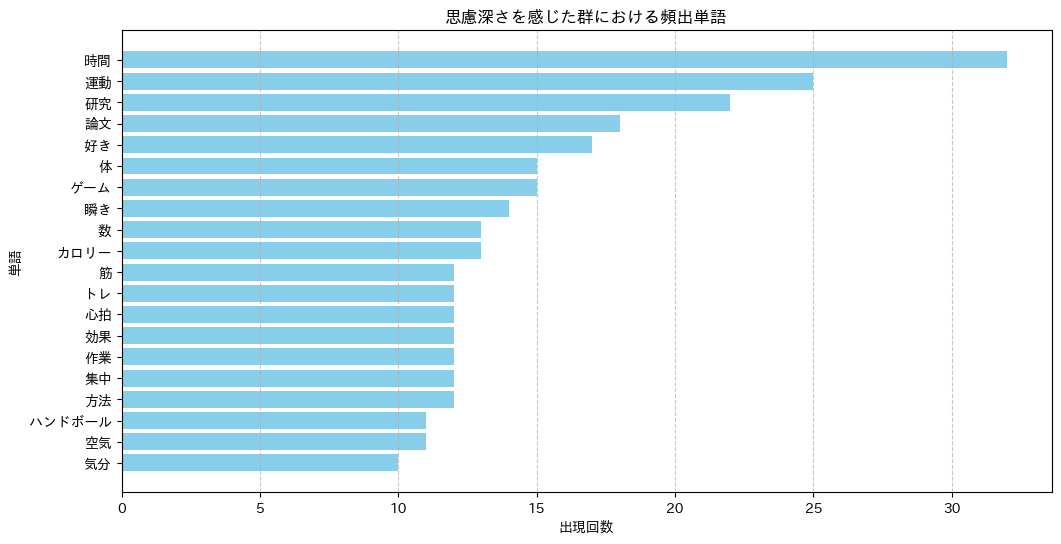

棒グラフを ./Analyzed/MorphologicalAnalysis/Positive_morphological_frequent_words.png に保存しました。


In [21]:
import os
import japanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from collections import Counter


morphological_dir = "./Analyzed/MorphologicalAnalysis/Positive_morphological/"
morph_files = [f for f in os.listdir(morphological_dir) if f.endswith(".csv")]

word_counts = Counter()

# すべてのファイルを処理
for file in morph_files:
    file_path = os.path.join(morphological_dir, file)
    
    # CSVを読み込む（フォーマット：Word,Count）
    df = pd.read_csv(file_path)
    
    # 各単語の出現回数を加算
    for _, row in df.iterrows():
        word_counts[row["Word"]] += row["Count"]


# 上位20単語を取得
top_words = word_counts.most_common(20)

# グラフ用データ作成
words, counts = zip(*top_words)

# グラフの作成
plt.figure(figsize=(12, 6))
plt.barh(words[::-1], counts[::-1], color="skyblue")  # 上位の単語が上に来るように[::-1]で反転
plt.xlabel("出現回数")
plt.ylabel("単語")
plt.title("思慮深さを感じた群における頻出単語")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# 画像として保存
plt.savefig("./Analyzed/MorphologicalAnalysis/Positive_morphological_frequent_words.png", dpi=300, bbox_inches="tight")
plt.show()

print("棒グラフを ./Analyzed/MorphologicalAnalysis/Positive_morphological_frequent_words.png に保存しました。")


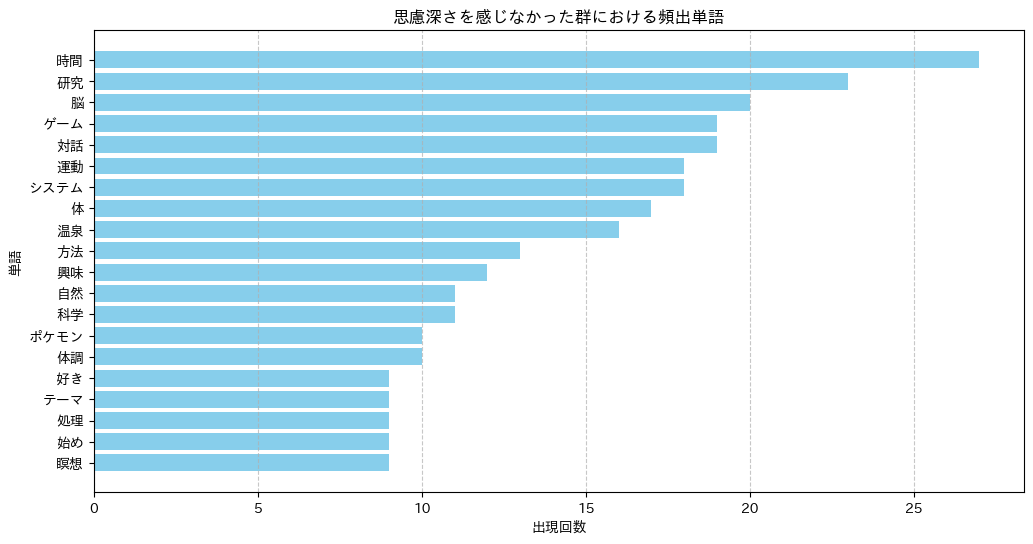

棒グラフを ./Analyzed/MorphologicalAnalysis/Negative_morphological_frequent_words.png に保存しました。


In [22]:
import os
import japanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from collections import Counter

morphological_dir = "./Analyzed/MorphologicalAnalysis/Negative_morphological/"
morph_files = [f for f in os.listdir(morphological_dir) if f.endswith(".csv")]

# 全単語の頻度を記録する辞書
word_counts = Counter()

# すべてのファイルを処理
for file in morph_files:
    file_path = os.path.join(morphological_dir, file)
    
    # CSVを読み込む（フォーマット：Word,Count）
    df = pd.read_csv(file_path)
    
    # 各単語の出現回数を加算
    for _, row in df.iterrows():
        word_counts[row["Word"]] += row["Count"]


# 上位20単語を取得
top_words = word_counts.most_common(20)

words, counts = zip(*top_words)

# グラフの作成
plt.figure(figsize=(12, 6))
plt.barh(words[::-1], counts[::-1], color="skyblue")  # 上位の単語が上に来るように[::-1]で反転
plt.xlabel("出現回数")
plt.ylabel("単語")
plt.title("思慮深さを感じなかった群における頻出単語")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# 画像として保存
plt.savefig("./Analyzed/MorphologicalAnalysis/Negative_morphological_frequent_words.png", dpi=300, bbox_inches="tight")
plt.show()

print("棒グラフを ./Analyzed/MorphologicalAnalysis/Negative_morphological_frequent_words.png に保存しました。")
